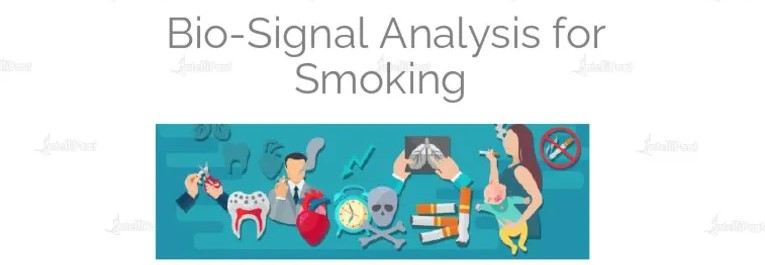

**Project Focus:**
To build an intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals. Given a person’s information, build a machine learning model that can classify the presence or absence of smoking.

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [ ]:
#Load the dataset
df = pd.read_csv('smoking.csv')

In [ ]:
#Check the head of the dataset
df.head().T

,0,1,2,3,4
ID,0,1,2,3,4
gender,F,F,M,M,F
age,40,40,55,40,40
height(cm),155,160,170,165,155
weight(kg),60,60,60,70,60
waist(cm),81.3,81.0,80.0,88.0,86.0
eyesight(left),1.2,0.8,0.8,1.5,1.0
eyesight(right),1.0,0.6,0.8,1.5,1.0
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0


In [ ]:
#Drop the irrelevant columns
df = df.drop(columns=["ID","oral"])

In [ ]:
#Check the head of the dataset again
df.head().T

,0,1,2,3,4
gender,F,F,M,M,F
age,40,40,55,40,40
height(cm),155,160,170,165,155
weight(kg),60,60,60,70,60
waist(cm),81.3,81.0,80.0,88.0,86.0
eyesight(left),1.2,0.8,0.8,1.5,1.0
eyesight(right),1.0,0.6,0.8,1.5,1.0
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0
systolic,114.0,119.0,138.0,100.0,120.0


In [ ]:
#Check the shape of the dataset
df.shape

(55692, 25)

In [ ]:
#Check the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [ ]:
#Check the statistical information of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.004830,9.679278,40.0,70.0,76.0,82.0,146.0


In [ ]:
#Check the missing values of the dataset
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

# Data Visualization

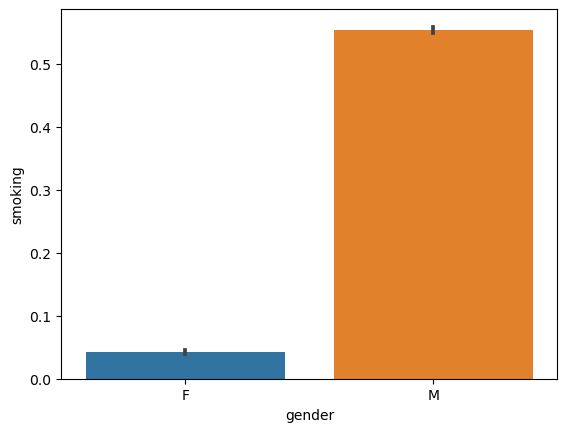

In [ ]:
#Check for smokers in male and female
sns.barplot(x=df['gender'], y=df['smoking'])
plt.show()

<Axes: xlabel='gender', ylabel='count'>

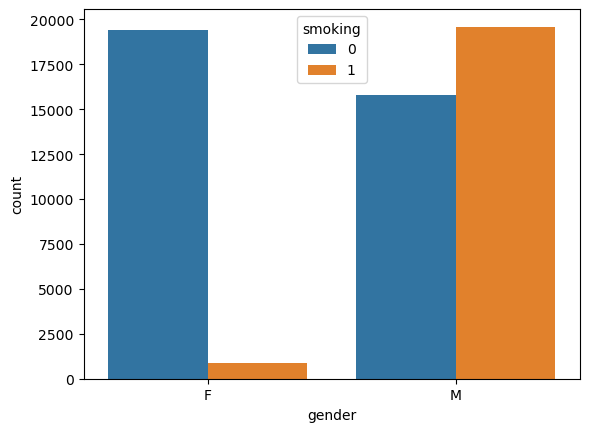

In [ ]:
#Check for smokers & non smokers in male and female
sns.countplot(x=df['gender'], hue=df['smoking'])

<Axes: ylabel='smoking'>

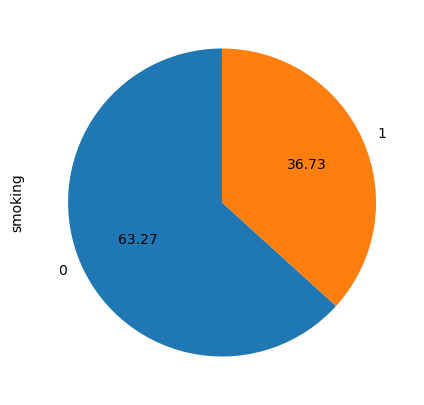

In [ ]:
#Check for the percentage of people who smoke cigarette
plt.figure(figsize=(10, 5))
df['smoking'].value_counts().plot.pie(autopct='%0.2f', startangle=90)

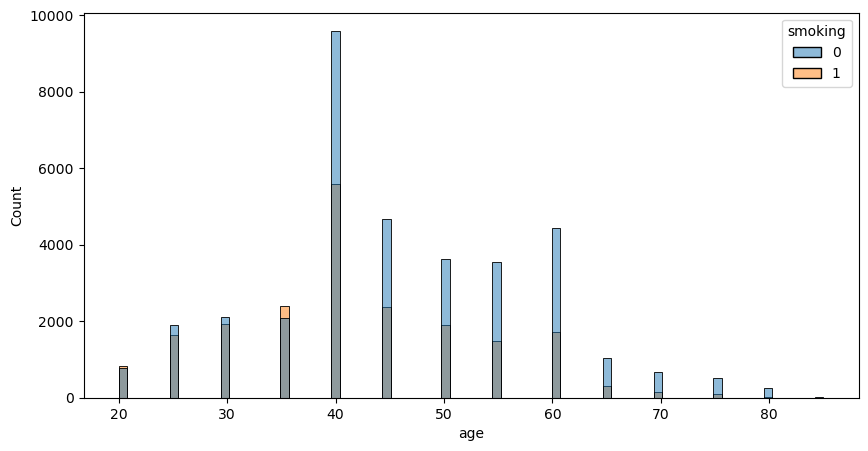

In [ ]:
#Check for smokers based on age
plt.figure(figsize=(10, 5))
sns.histplot(x=df['age'], hue=df['smoking'])
plt.show()

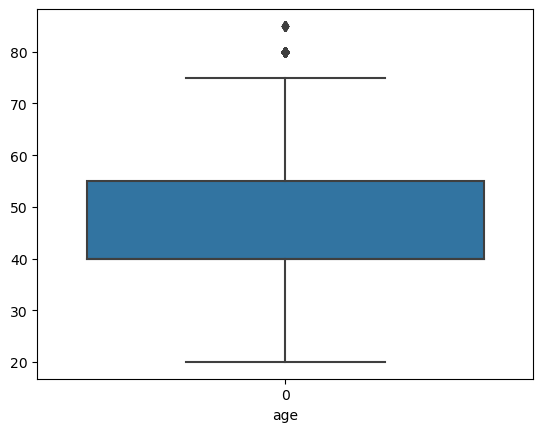

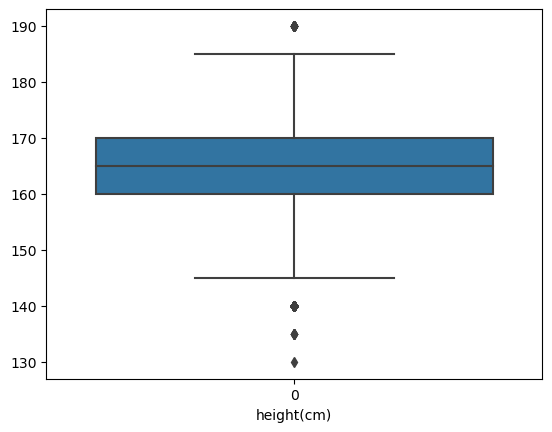

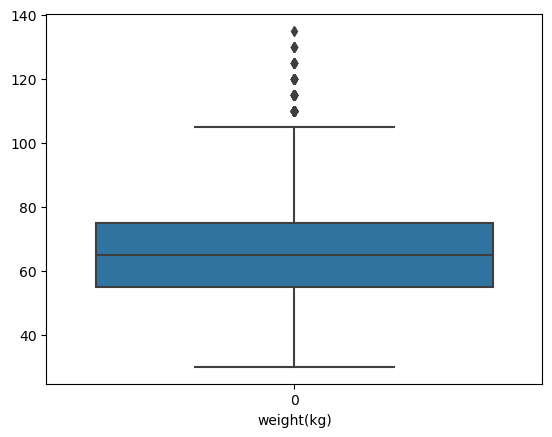

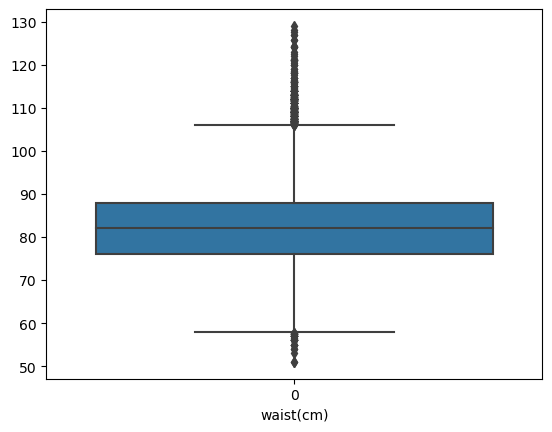

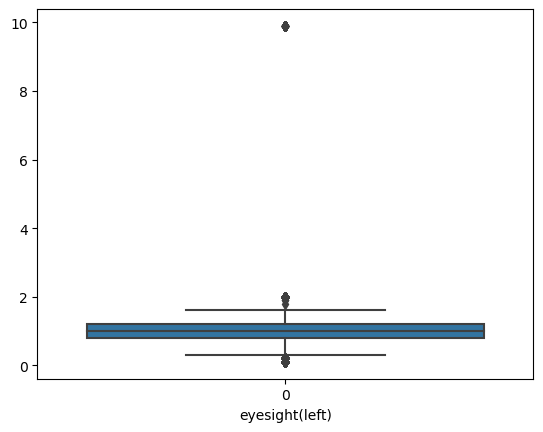

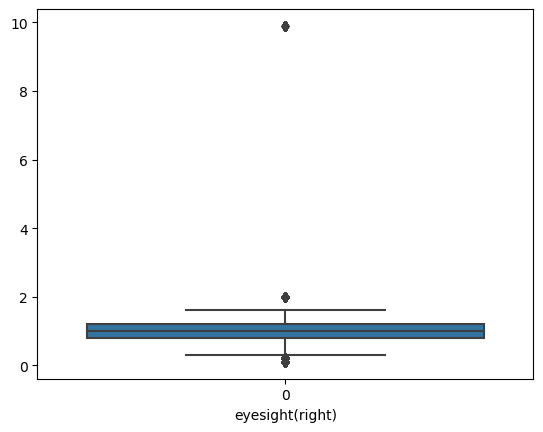

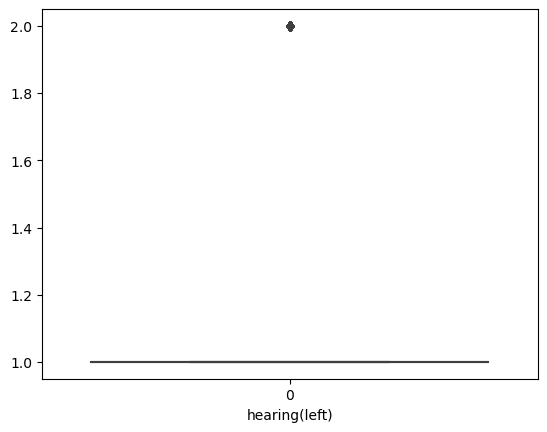

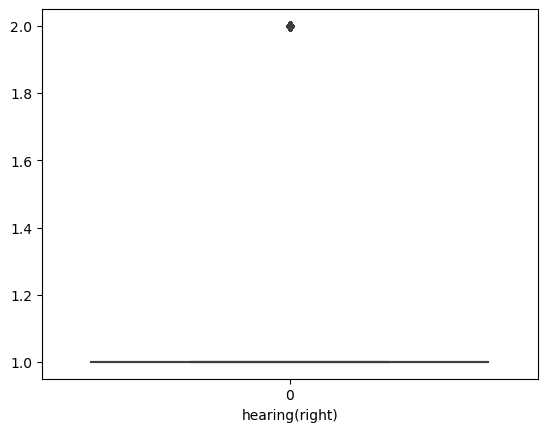

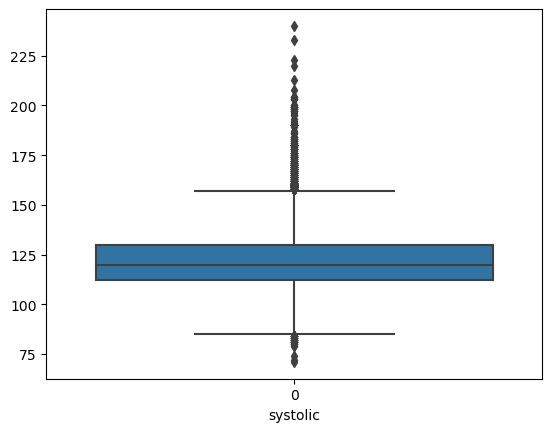

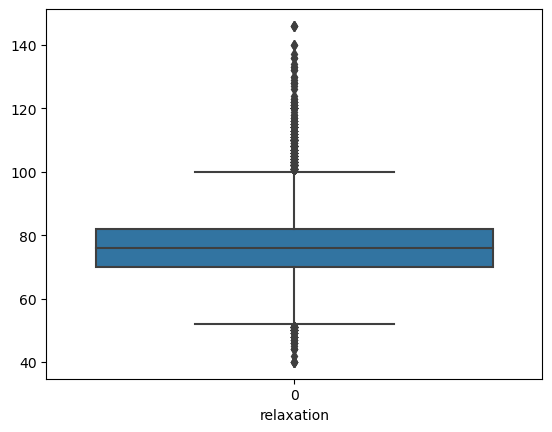

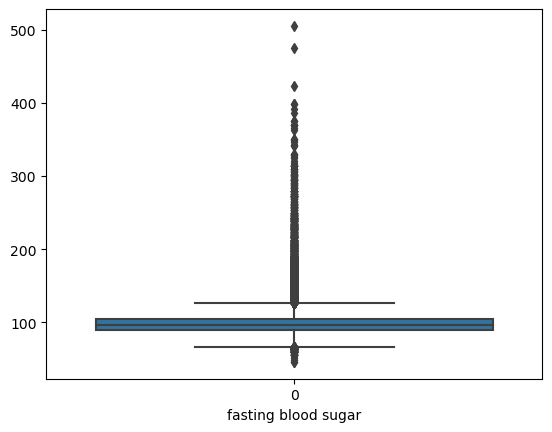

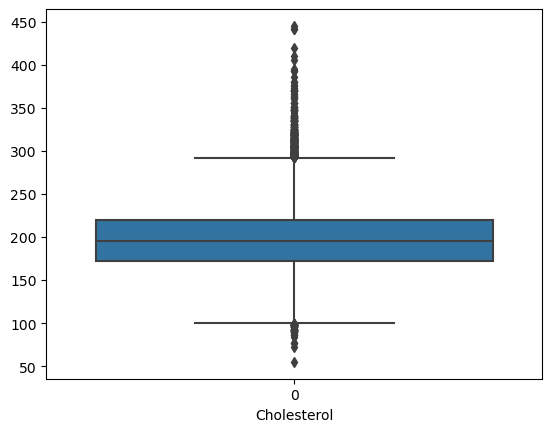

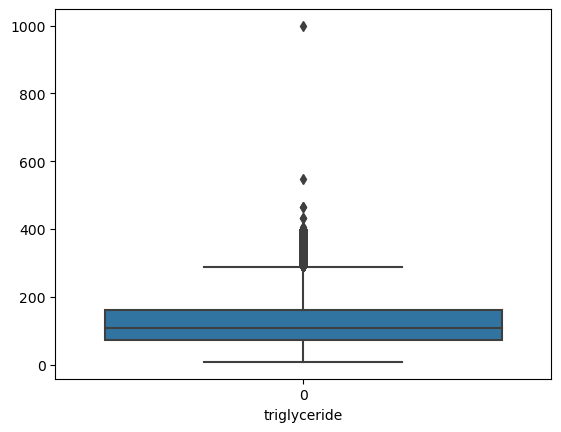

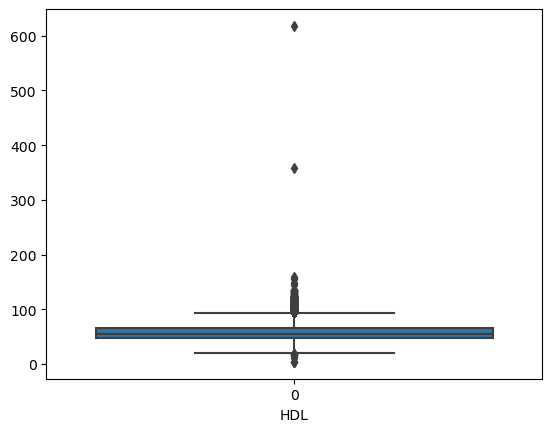

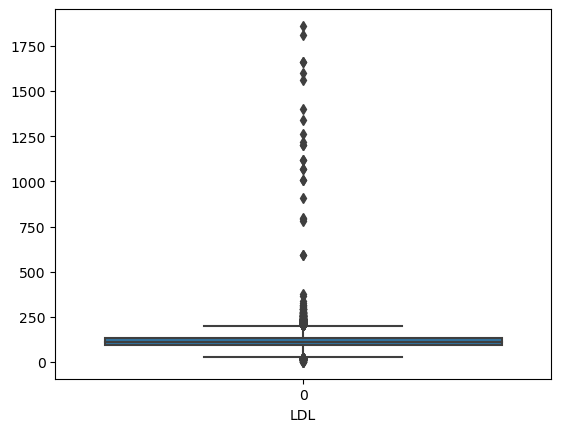

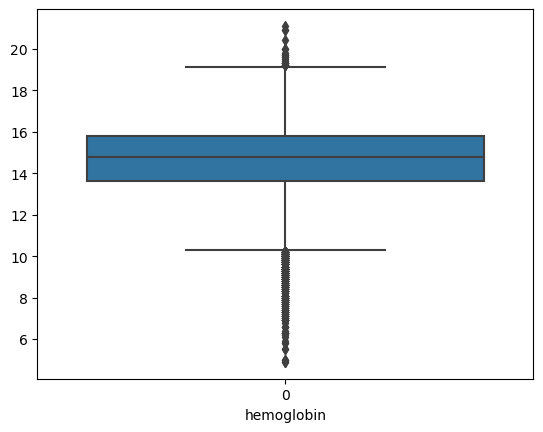

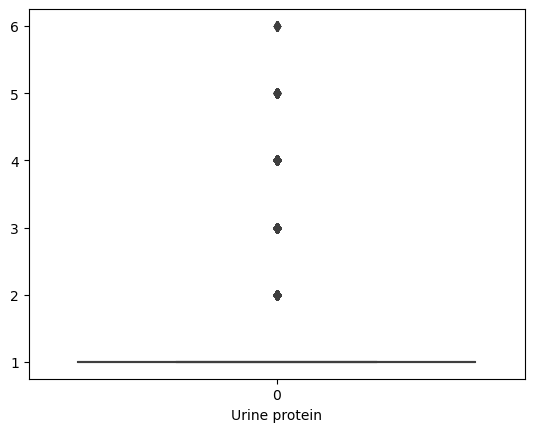

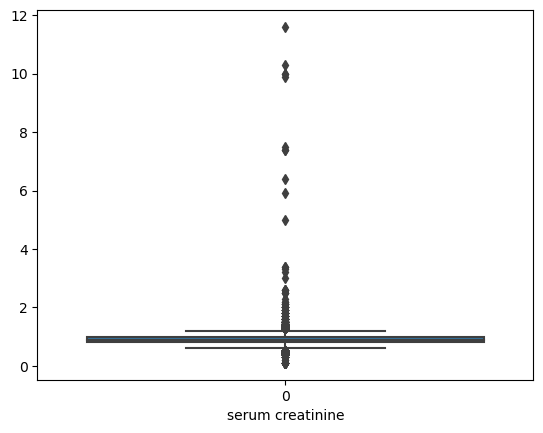

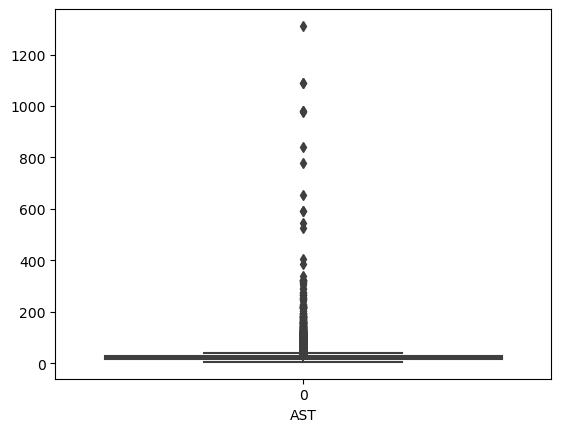

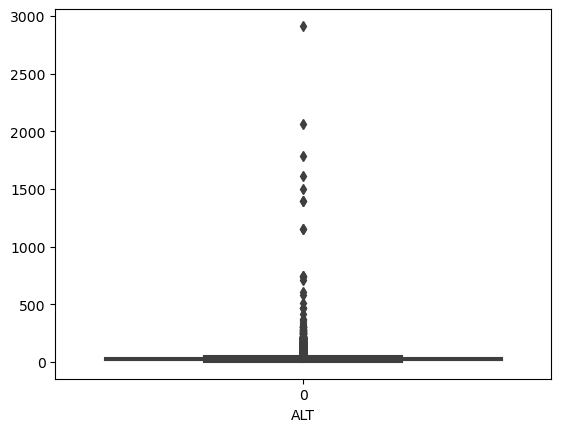

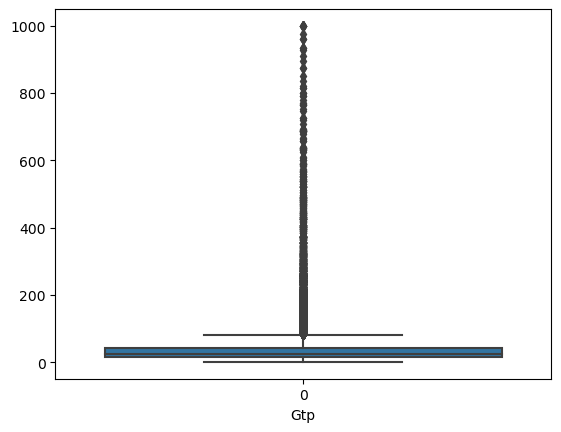

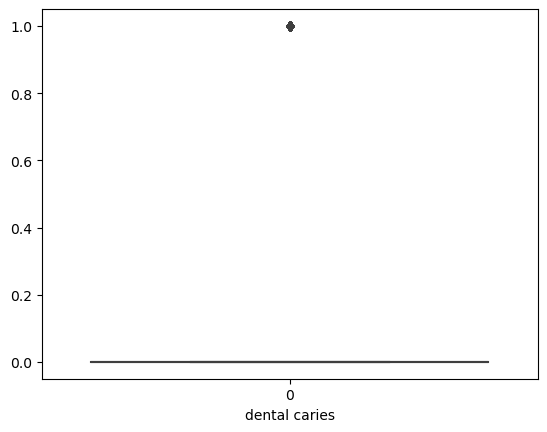

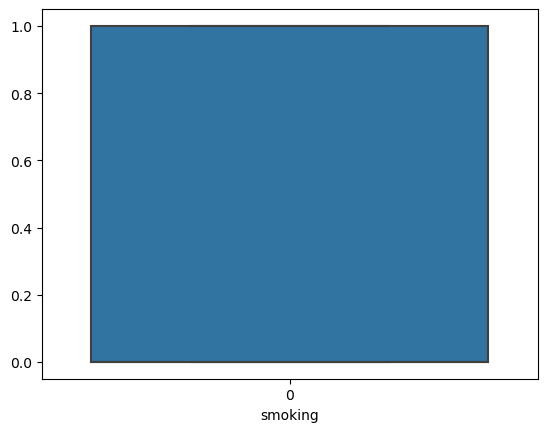

In [ ]:
#Check for outliers
for i in df.columns:
    if (df[i].dtype == 'int64' or df[i].dtype == 'float64'):
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

Here outliers represent natural variations in the population, and they should be left as is in the dataset. These are called
true outliers. Therefore for this dataset we will not remove outliers.

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [ ]:
#Check the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

# Feature Selection using Feature Importance

In [ ]:
#Independent and dependent variables
X = df.iloc[:, :-1]
y = df['smoking']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#Create the instance
model = ExtraTreesClassifier()

In [ ]:
model.fit(X, y)

ExtraTreesClassifier()

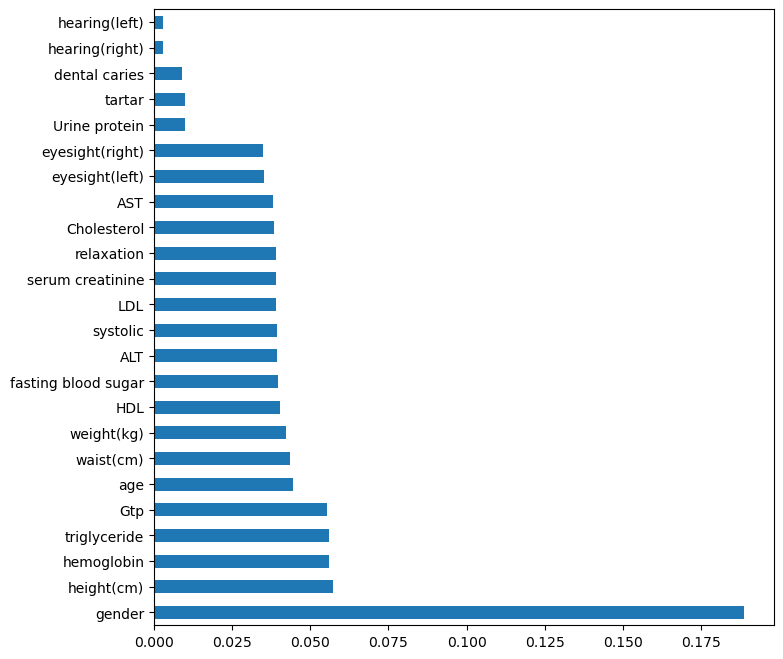

In [ ]:
df1 = pd.Series(model.feature_importances_, index = X.columns)
plt.figure(figsize=(8, 8))
df1.nlargest(24).plot(kind='barh')
plt.show()

Feature importance is a technique that calculate a score for all the input features for a given model. So out of 24 features we
will select the top 15 features based on the score.

In [ ]:
X = df[['gender','height(cm)','hemoglobin','triglyceride','Gtp','age','waist(cm)','weight(kg)','HDL','fasting blood sugar','ALT','systolic','LDL','serum creatinine','relaxation']]
y = df['smoking']

# Split the dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Create the instance
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Create the instance
lr = LogisticRegression()

In [ ]:
#Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict on the test set
y_pred = lr.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Check the accuracy
print("Accuracy of Logistic Regression model :",accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression model : 0.7348954125145883


In [ ]:
print("Classification report :\n",classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Create the instance
dt = DecisionTreeClassifier()

In [ ]:
#Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predict on the test set
y_pred = dt.predict(X_test)

In [ ]:
#Check the accuracy of the model
print("Accuracy of Decision Tree model :",accuracy_score(y_test, y_pred))

Accuracy of Decision Tree model : 0.7796929706436844


In [ ]:
print("Classification report :\n",classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.70      0.70      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.78      0.78     11139



# Bagging Algorithm – Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
#Create the instance
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)

In [ ]:
#Train the model and print the accuracy score
bagging_clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8262860220845677

In [ ]:
#Predict on the test set
y_pred = bagging_clf.predict(X_test)

In [ ]:
print("Classification report :\n",classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Bagging Algorithm – Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#Create the instance
et = ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [ ]:
#Train the model
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [ ]:
#Predict on the test set
y_pred = et.predict(X_test)

In [ ]:
#Check the accuracy of the model
print("Accuracy of Extra Trees model :",accuracy_score(y_test, y_pred))

Accuracy of Extra Trees model : 0.8315827273543406


In [ ]:
print("Classification report :\n",classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Bagging Algorithm – Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create the instance
rfc = RandomForestClassifier(n_estimators=1000)

In [ ]:
#Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
#Predict on the test set
y_pred = rfc.predict(X_test)

In [ ]:
#Check the accuracy of the model
print("Accuracy of Random Forest model :",accuracy_score(y_test, y_pred))

Accuracy of Random Forest model : 0.8315827273543406


In [ ]:
print("Classification report :\n",classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139

